In [1]:
# Load "numpy" and "pandas" for manipulating numbers and data frames
# Load "matplotlib.pyplot" and "seaborn" for data visualisation
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Creation of data frame using csv file
data = pd.read_csv("index.csv")

In [3]:
# A brief look at the data
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
# Get the dimensions of the dataframe
data.shape

(2341, 6)

In [5]:
# Get the row names of the dataframe
data.index

RangeIndex(start=0, stop=2341, step=1)

In [6]:
# Look at basic information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2341 non-null   object 
 1   datetime     2341 non-null   object 
 2   cash_type    2341 non-null   object 
 3   card         2252 non-null   object 
 4   money        2341 non-null   float64
 5   coffee_name  2341 non-null   object 
dtypes: float64(1), object(5)
memory usage: 109.9+ KB


In [7]:
#Checking for the null vaules
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [8]:
# Checking for duplicate data
data.duplicated().sum()

np.int64(0)

In [9]:
data.describe()

,money
count,2341.000000
mean,31.816736
std,5.094530
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [10]:
# unique values in feature cash_type
print(data['cash_type'].unique())

['card' 'cash']


In [11]:
# unique values in feature coffee_name
print(data['coffee_name'].unique())


['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino']


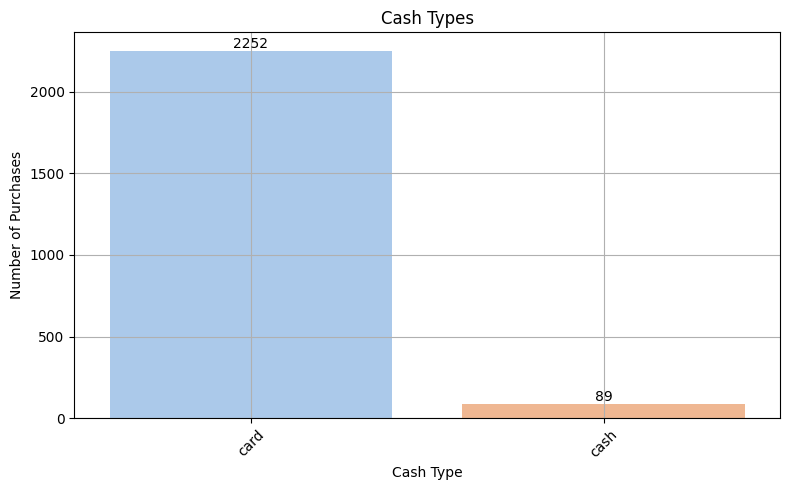

In [12]:
# Plot based on cash type
plt.figure(figsize=(8, 5))
ax = sns.countplot(data = data, x = 'cash_type',hue='cash_type',palette="pastel")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Cash Types')
plt.xlabel('Cash Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

***Observation***
From the above graph we can see the observation
All of the transactions with null 'card' information are from cash users.


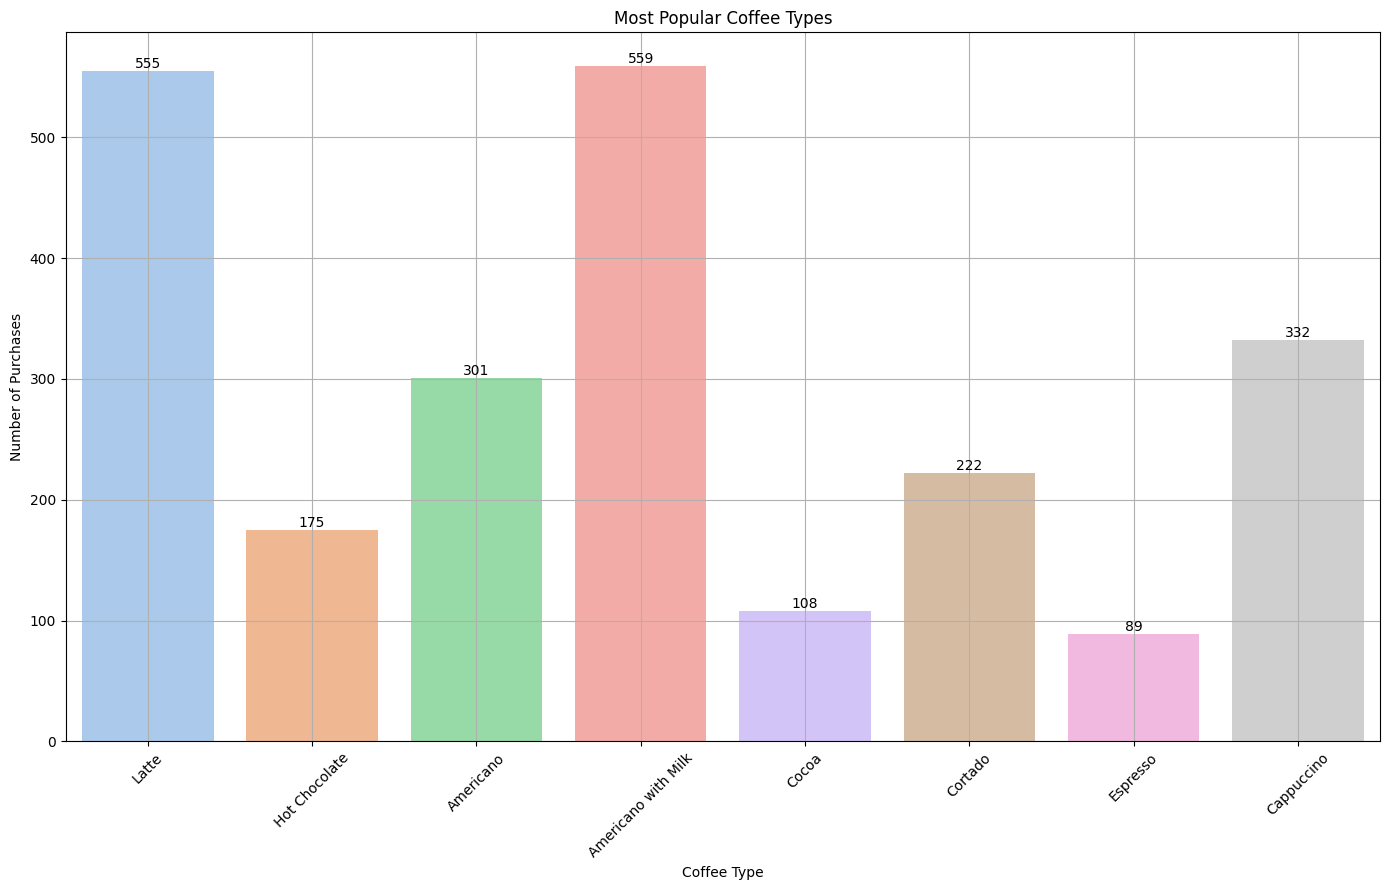

In [20]:
# Number of cups sold based on coffee type or name
plt.figure(figsize=(14, 9))
ax = sns.countplot(data = data, x = 'coffee_name', hue='coffee_name',palette="pastel")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Most Popular Coffee Types')
plt.xlabel('Coffee Type')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

***Observation*** From the above graph we can see the most popular coffee type is Americano with Milk

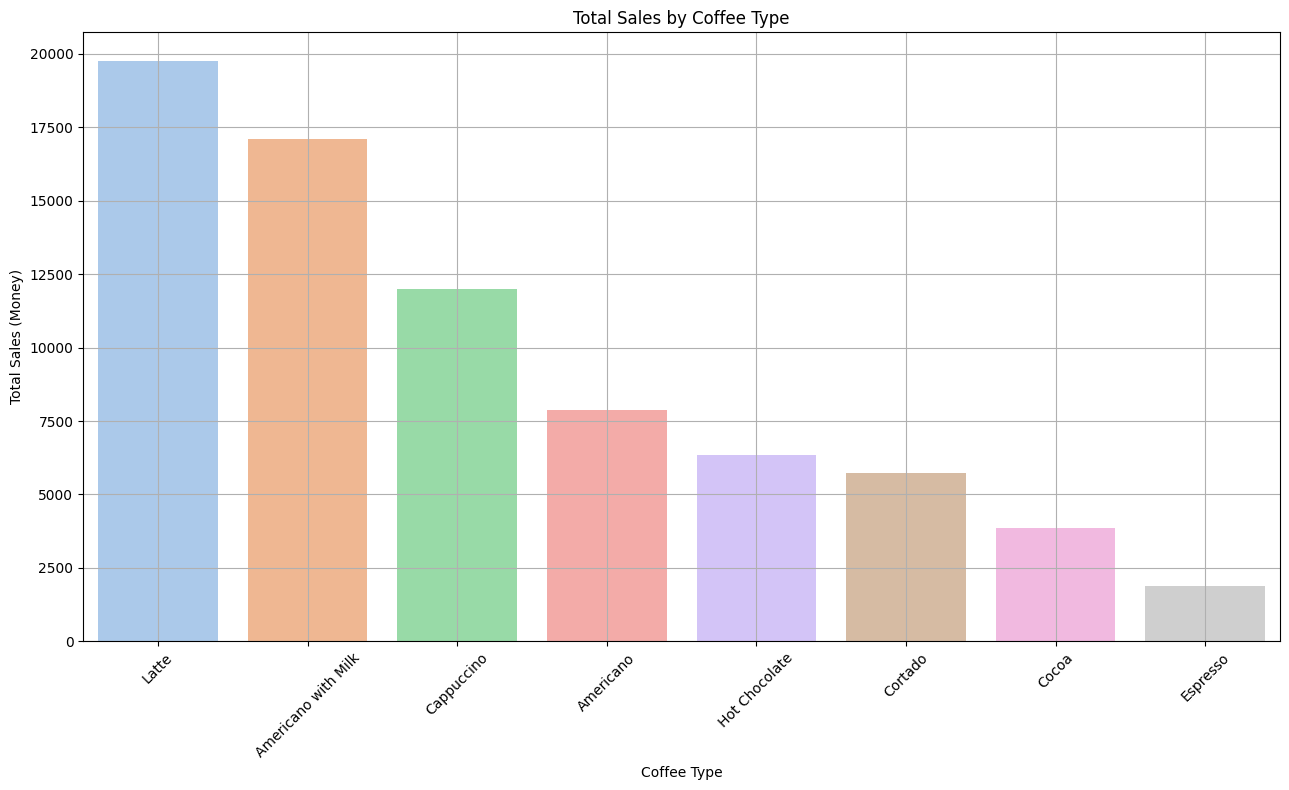

In [21]:
# Analysis based on revenue generated by each coffee type
plt.figure(figsize=(13, 8))
sales_by_coffee_type = data.groupby(['coffee_name'], as_index=False)['money'].sum().sort_values(by='money', ascending=False)
sns.barplot(data = sales_by_coffee_type, x = 'coffee_name',y= 'money', hue='coffee_name',palette="pastel")
plt.title('Total Sales by Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

***Observation*** AS per the sales latte generate more revenue 

In [15]:
# Extracting data based on month, week, day and time
data["datetime"] = pd.to_datetime(data["datetime"])
data["date"] = pd.to_datetime(data["date"])
data["month"] = data["date"].dt.to_period("M")
data["week"] = data["date"].dt.to_period("W")
data['time'] = data['datetime'].dt.floor('15T').dt.time

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10944\3258929586.py:6: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  data['time'] = data['datetime'].dt.floor('15T').dt.time


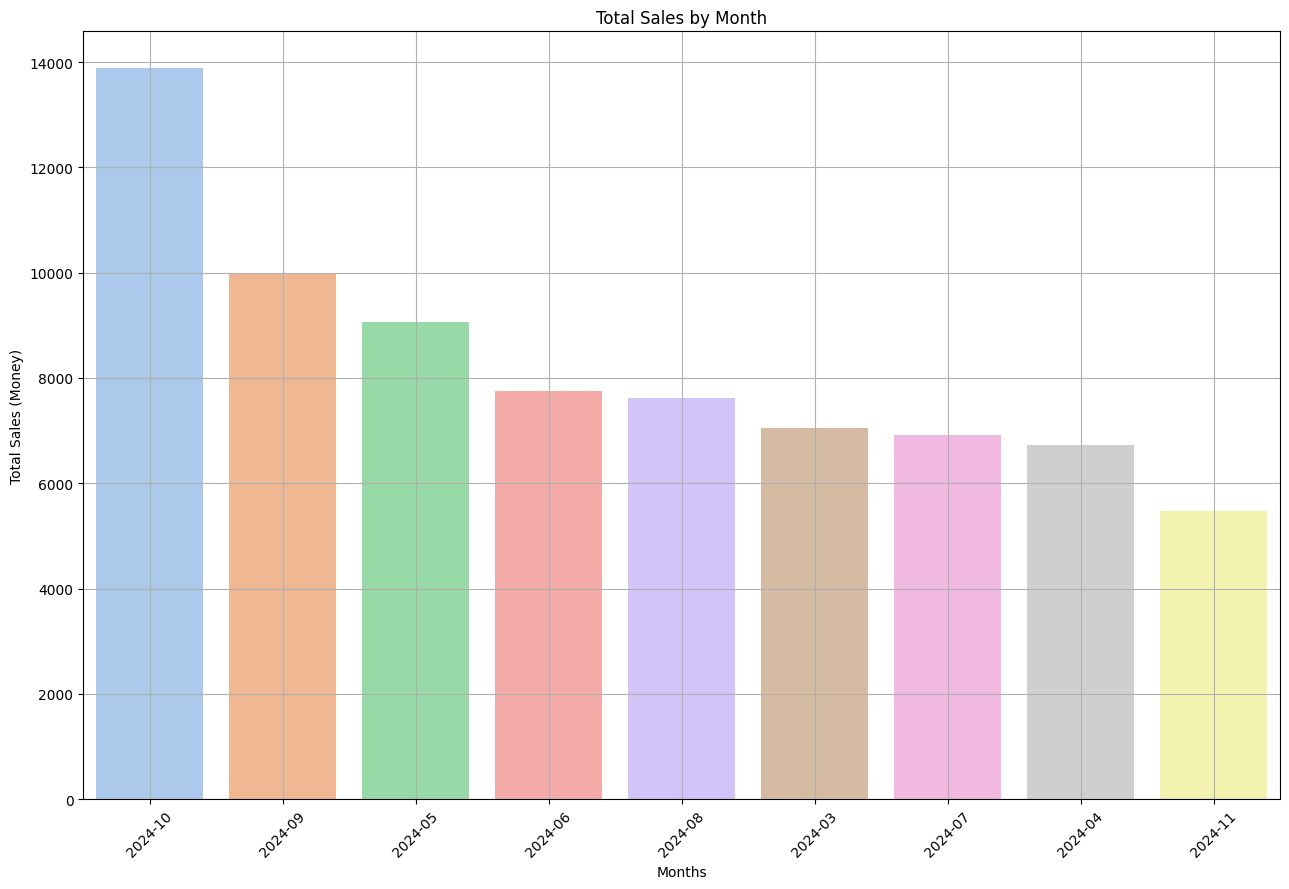

In [22]:
# Sales trend based on Months
plt.figure(figsize=(13, 9))
sales_by_month = data.groupby(['month'], as_index=False)['money'].sum().sort_values(by='money', ascending=False)
sns.barplot(data = sales_by_month, x = 'month',y= 'money', hue='month',palette="pastel")
plt.title('Total Sales by Month')
plt.xlabel('Months')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

***Observation*** As per above graph the trend show maximum sales in the month of October

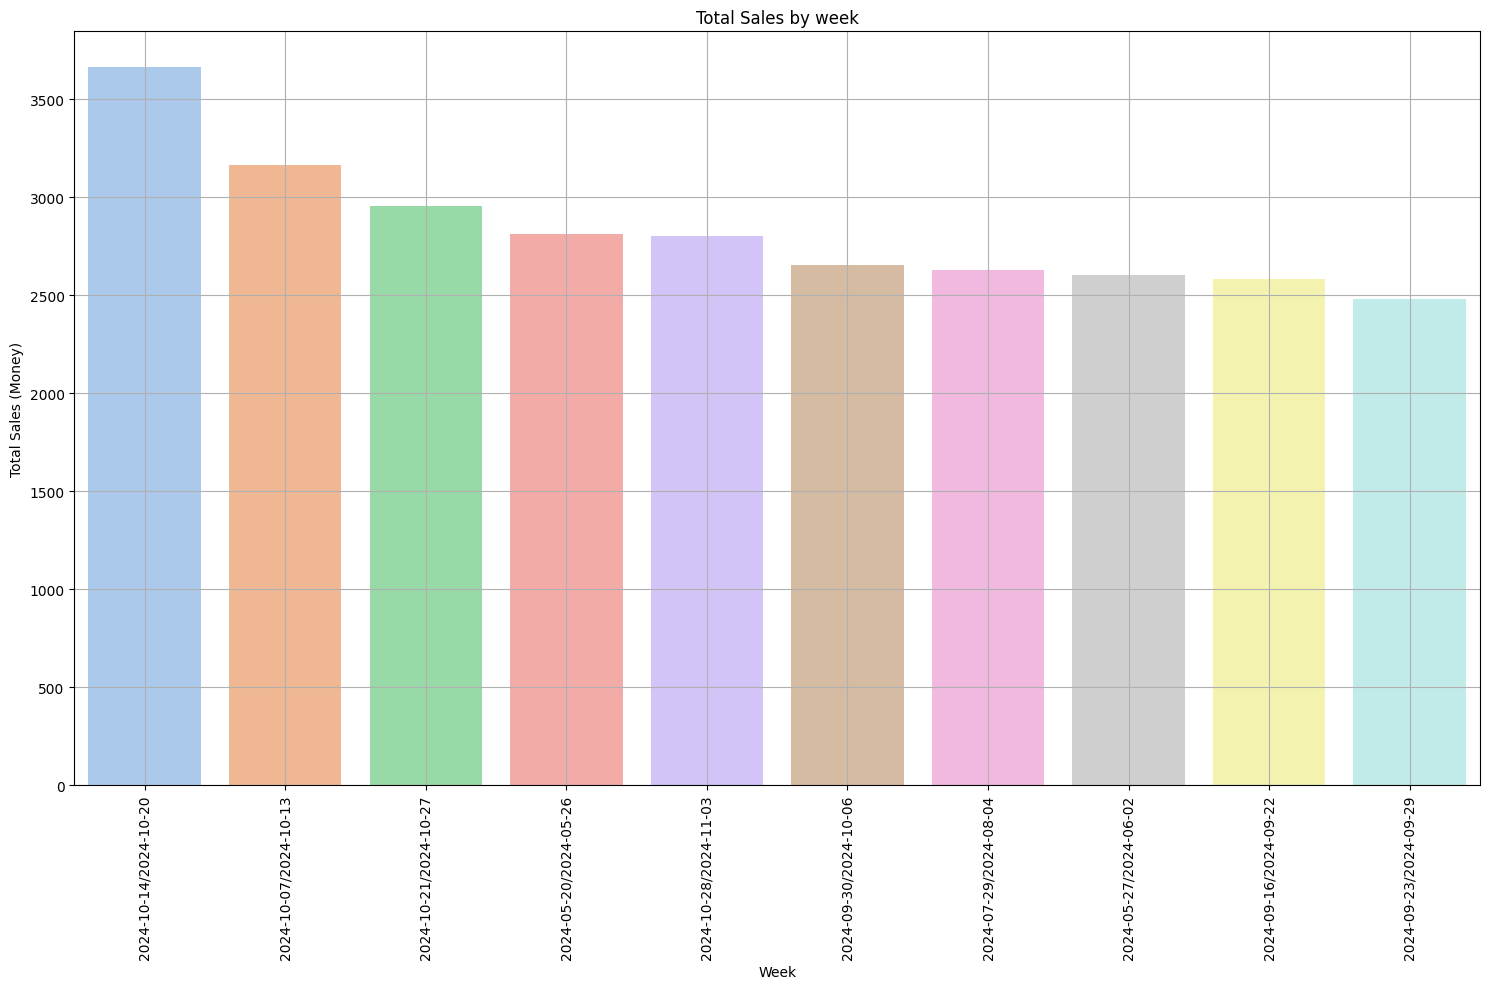

In [17]:
# Sales trend based on Week
plt.figure(figsize=(15, 10))
sales_by_week = data.groupby(['week'], as_index=False)['money'].sum().sort_values(by='money', ascending=False).head(10)
sns.barplot(data = sales_by_week, x = 'week',y= 'money', hue='week',palette="pastel")
plt.title('Total Sales by week')
plt.xlabel('Week')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

***Observation*** As per above graph we can say that trend show maximum sales between 14 and 20 October

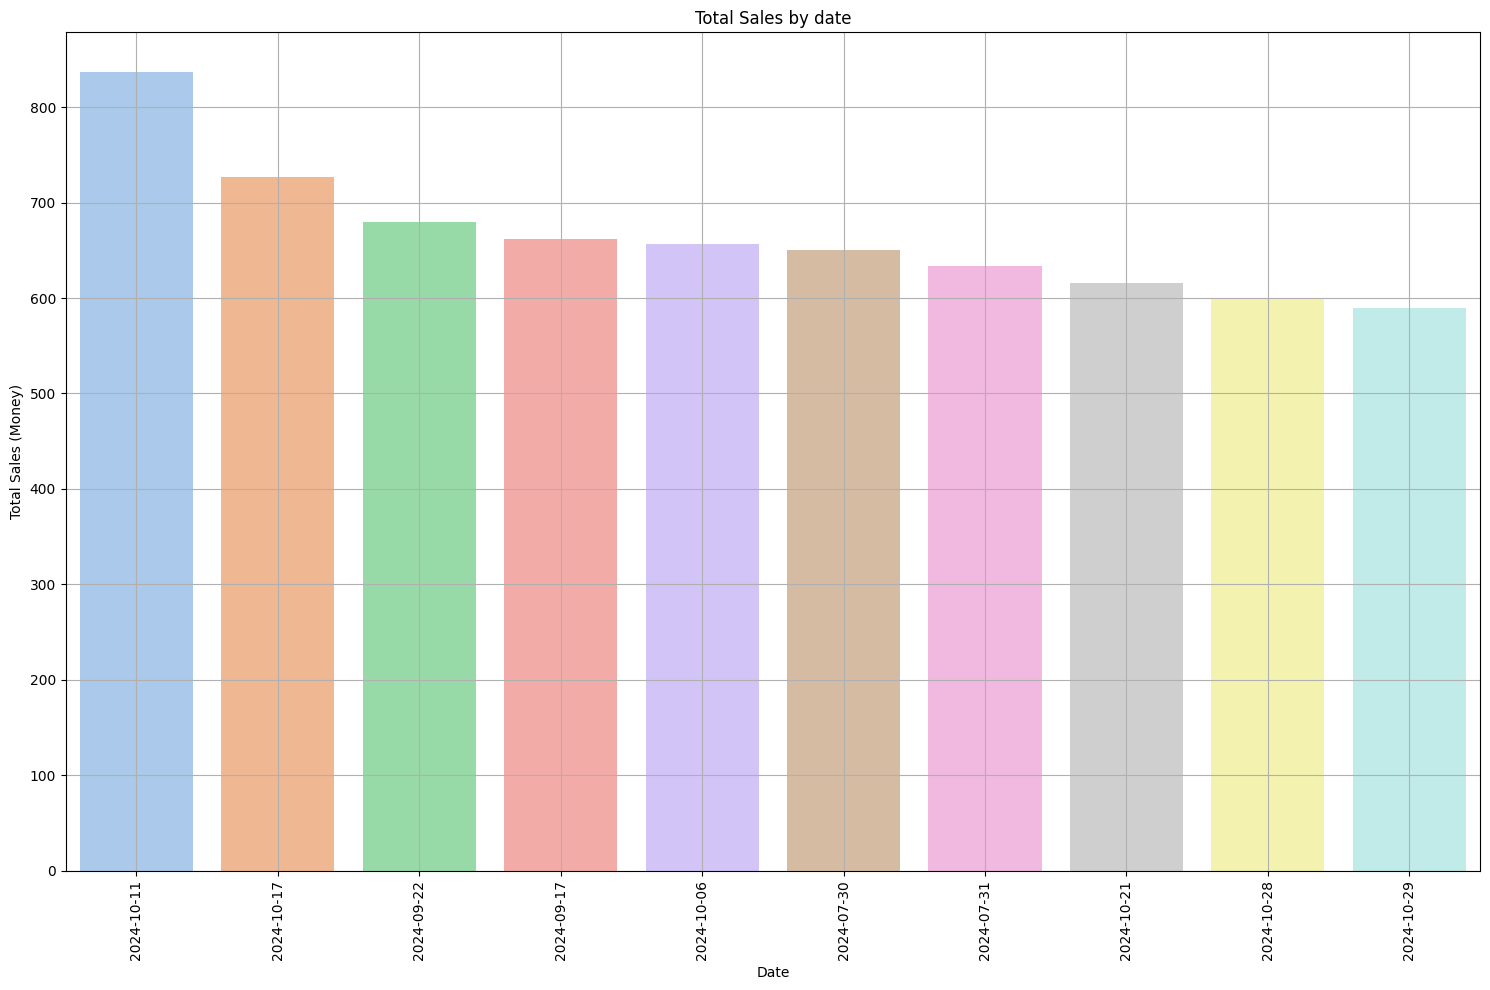

In [18]:
# Sales trend based on Date 
plt.figure(figsize=(15, 10))
sales_by_date = data.groupby(['date'], as_index=False)['money'].sum().sort_values(by='money', ascending=False).head(10)
sns.barplot(data = sales_by_date, x = 'date',y= 'money', hue='date',palette="pastel")
plt.title('Total Sales by date')
plt.xlabel('Date')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

***Obsevation*** We can observe from the above graph on the date 11th October 2024 maximum sales has happened

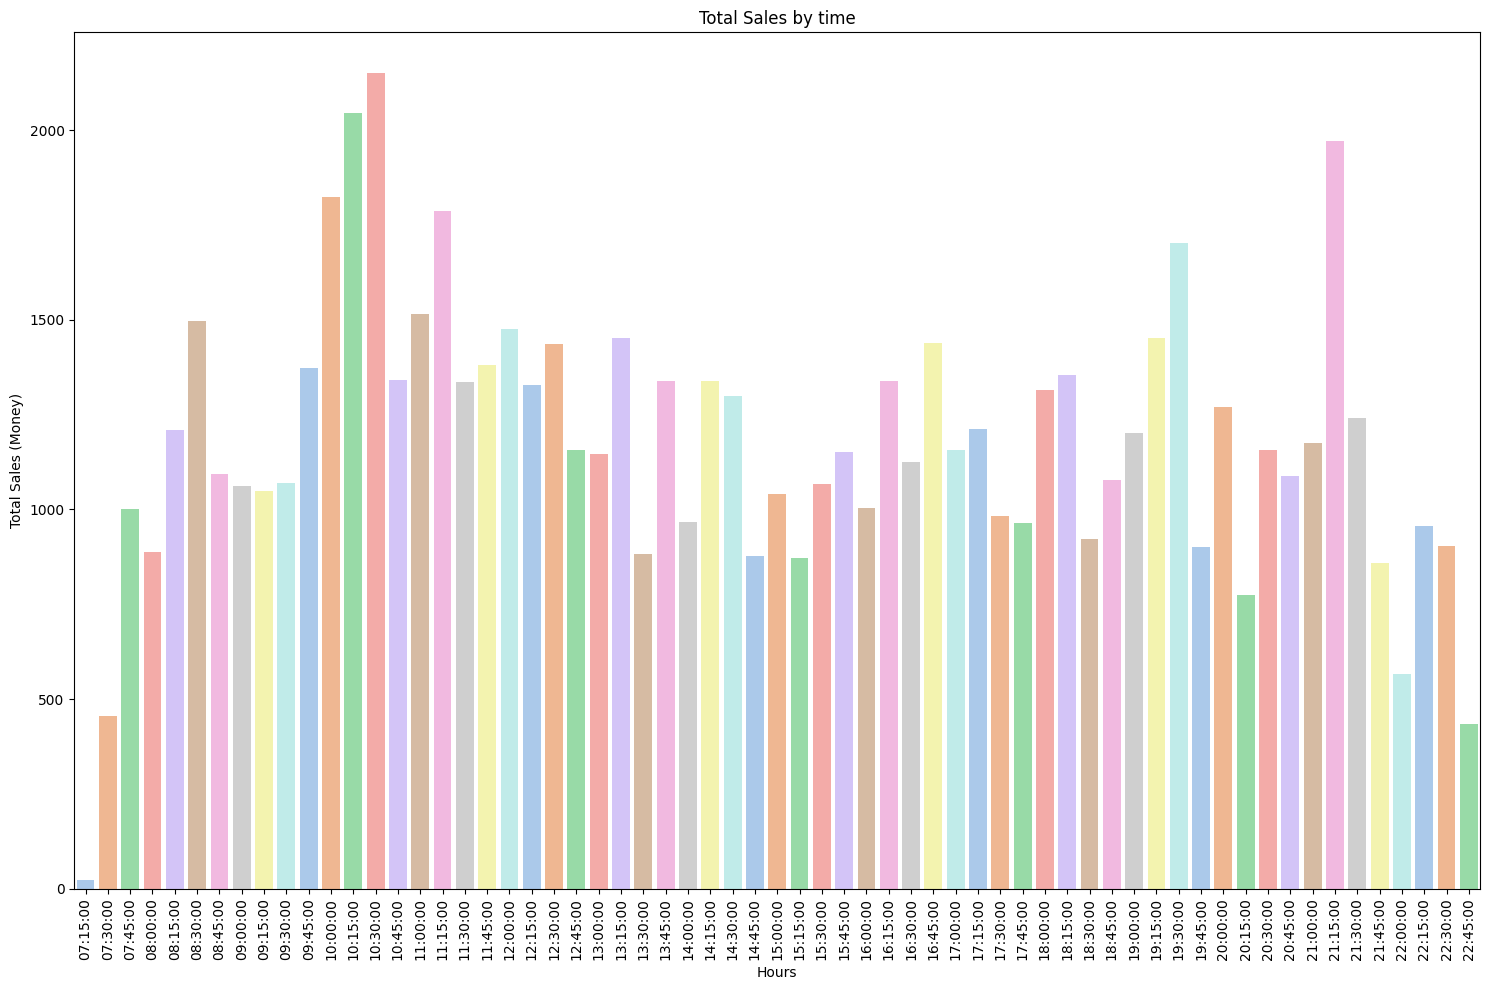

In [19]:
# Sales trend based on time
plt.figure(figsize=(15, 10))
sales_by_time = data.groupby(['time'], as_index=False)['money'].sum()#.sort_values(by='money', ascending=False)
sns.barplot(data = sales_by_time, x = 'time',y= 'money', hue='time',palette="pastel",legend=False)
plt.title('Total Sales by time')
plt.xlabel('Hours')
plt.ylabel('Total Sales (Money)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***Observation*** We can observer that maximum coffee sales happen at 10:30 AM.

***Conclusion***
The coffee sales analysis reveals critical patterns in customer preferences, revenue generation, and seasonal trends, which can significantly impact business strategies. Below are the key takeaways:
1. **Customer Preferences :**
Americano with Milk emerged as the most popular choice, highlighting a preference for classic yet slightly customized coffee options. This trend suggests a loyal customer base for this product, which may benefit from targeted marketing campaigns or promotions.
2. **Revenue Contributions :**
Despite Americano with Milk being the most frequently sold, Latte contributes the highest revenue. This indicates a higher price point or larger serving sizes, making it a premium product. Focused marketing to promote Latte as a specialty offering could further enhance revenue.
3. **Payment Trends :**
A significant proportion of transactions are cash-based, as inferred from missing card details. While cash payments are convenient, encouraging card or digital payments through discounts or loyalty rewards could streamline transactions and improve customer insights.
4. **Seasonal Insights :**
Sales peak in October, particularly mid-month, which may be attributed to seasonal promotions, weather patterns, or special events. Understanding the exact drivers behind this surge can help replicate the success in other months.
5. **Overall Business Impact :**
The business can leverage these insights to optimize inventory, tailor promotions, and prioritize customer engagement. For example:
6. **Stock Management :** Ensure sufficient ingredients for Americano with Milk and Latte during peak seasons.
7. **Pricing Strategies :** Consider adjusting the pricing of less popular items to improve their sales or profitability.
8. **Marketing Campaigns :** Launch promotions for high-revenue items and less popular options to diversify customer preferences.
9. **Future Opportunities :**
Introduce new variations or limited-time offers for popular products like Americano with Milk to maintain customer interest.
Use data from card transactions to understand customer demographics and design targeted loyalty programs.
Monitor weekly or daily trends for micro-level optimizations, such as staffing during peak hours.

By applying these recommendations, the business can enhance its operational efficiency, customer satisfaction, and overall profitability. Continued analysis and refinement of these strategies, based on updated sales data, will ensure sustained growth in the competitive coffee market.
